## 机器学习
- 有监督学习
    - 回归（连续性变量）
    - 分类（离散型变量）
- 无监督学习

In [1]:
# 引入相关的计算包
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

### 1.1 回归
使用sklearn内置数据集Boston房价数据集

In [2]:
from sklearn import datasets
boston=datasets.load_boston()
x=boston.data
y=boston.target
features=boston.feature_names
boston_data=pd.DataFrame(x, columns=features)
boston_data["Price"]=y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


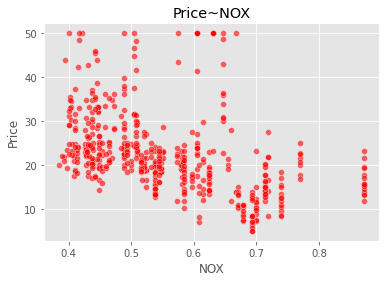

In [3]:
sns.scatterplot(boston_data['NOX'],boston_data['Price'],color="r",alpha=0.6)
plt.title("Price~NOX")
plt.show()

我们可以看到，数据给定任务所需要的因变量，因变量为波士顿房价Price是一个连续型变量，所以这是一个回归的例子。
各个特征的相关解释：
- CRIM：各城镇的人均犯罪率
- ZN：规划地段超过25,000平方英尺的住宅用地比例
- INDUS：城镇非零售商业用地比例
- CHAS：是否在查尔斯河边(=1是)
- NOX：一氧化氮浓度(/千万分之一)
- RM：每个住宅的平均房间数
- AGE：1940年以前建造的自住房屋的比例
- DIS：到波士顿五个就业中心的加权距离
- RAD：放射状公路的可达性指数
- TAX：全部价值的房产税率(每1万美元)
- PTRATIO：按城镇分配的学生与教师比例
- B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
- LSTAT：较低地位人口
- Price：房价

### 1.2 分类
以iris数据集为例：

In [4]:
from sklearn import datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target
features = iris.feature_names
iris_data=pd.DataFrame(x, columns=[features])
iris_data['target']=y
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


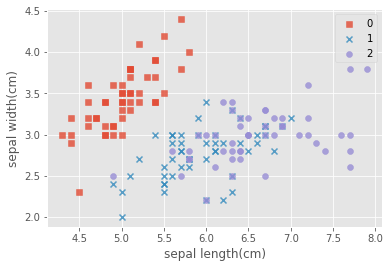

In [5]:
# 可视化特征
marker=['s','x','o']
for index,c in enumerate(np.unique(y)):
    plt.scatter(x=iris_data.loc[y==c,"sepal length (cm)"],
    y=iris_data.loc[y==c,"sepal width (cm)"],
    alpha=0.8,label=c,marker=marker[c]) # alpha:透明度;
plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width(cm)")
plt.legend()
plt.show()

各个特征的相关解释：

- sepal length (cm)：花萼长度(厘米)
- sepal width (cm)：花萼宽度(厘米)
- petal length (cm)：花瓣长度(厘米)
- petal width (cm)：花瓣宽度(厘米)

### 1.3 无监督学习

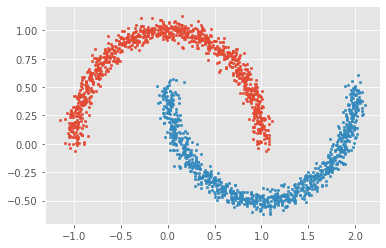

In [6]:
# 生成月牙型非凸集
from sklearn import datasets
x,y=datasets.make_moons(n_samples=2000,shuffle=True,noise=0.05,random_state=None)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=6) # s:点的大小
plt.show()

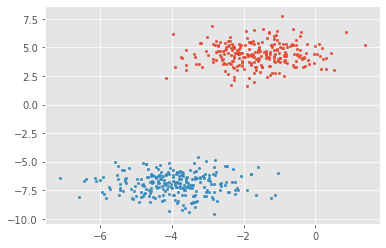

In [7]:
# 生成符合正太分布的聚类数据
from sklearn import datasets
from sklearn.utils.validation import _num_samples
x,y=datasets.make_blobs(n_samples=500,n_features=3,centers=2,random_state=True)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=6)
plt.show()

## 2.使用sklearn构建完整的机器学习项目流程
一般来说，一个完整的机器学习项目分为以下步骤：
- 明确项目任务：分类/回归
- 收集数据集并选择合适的特征
- 选择度量模型性能的指标
- 选择具体的模型并进行训练以优化模型
- 评估模型的性能并调参

### 2.1 使用sklearn构建完整的回归项目
#### (1) 收集数据集并选择合适的特征
以Boston房价数据集为例：

In [8]:
from sklearn import datasets
boston = datasets.load_boston()
x=boston.data
y=boston.target
features=boston.feature_names
boston_data=pd.DataFrame(x, columns=[features])
boston_data["Price"]=y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


各个特征的相关解释：
- CRIM：各城镇的人均犯罪率
- ZN：规划地段超过25,000平方英尺的住宅用地比例
- INDUS：城镇非零售商业用地比例
- CHAS：是否在查尔斯河边(=1是)
- NOX：一氧化氮浓度(/千万分之一)
- RM：每个住宅的平均房间数
- AGE：1940年以前建造的自住房屋的比例
- DIS：到波士顿五个就业中心的加权距离
- RAD：放射状公路的可达性指数
- TAX：全部价值的房产税率(每1万美元)
- PTRATIO：按城镇分配的学生与教师比例
- B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
- LSTAT：较低地位人口
- Price：房价

#### (2) 选择度量性能的指标
- MSE均方误差：$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$
   - MAE平均绝对误差:$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$
   - $R^2$决定系数：$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
   - 解释方差得分:$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$

#### (3) 选择具体的模型并进行训练
**(a) 选择线性回归模型**
选择MSE均方误差为性能指标

In [9]:
from sklearn import linear_model
lin_regression=linear_model.LinearRegression()
lin_regression.fit(x,y)
print("模型系数：",lin_regression.coef_) # 输出模型的系数
print("模型得分：",lin_regression.score(x,y)) # 输出模型的决定系数R^2

模型系数： [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
模型得分： 0.7406426641094095


**(b)线性回归的推广**

当数据是非线性的，线性回归的模型就不能很好的满足预测的需求

为了体现因变量和特征的非线性关系，一个很自然而然的想法就是将标准的线性回归模型：             
   $$
   y_i = w_0 + w_1x_i + \epsilon_i
   $$               
   **1.换成一个多项式函数：**          
   $$
   y_i = w_0 + w_1x_i + w_2x_i^2 + ...+w_dx_i^d + \epsilon
   $$ 

  **2.广义可加模型（GAM）**
                  
   $$
   y_i = w_0 + \sum\limits_{j=1}^{p}f_{j}(x_{ij}) + \epsilon_i
   $$ 

   GAM模型的优点与不足：             
      - 优点：简单容易操作，能够很自然地推广线性回归模型至非线性模型，使得模型的预测精度有所上升；由于模型本身是可加的，因此GAM还是能像线性回归模型一样把其他因素控制不变的情况下单独对某个变量进行推断，极大地保留了线性回归的易于推断的性质。
      - 缺点：GAM模型会经常忽略一些有意义的交互作用，比如某两个特征共同影响因变量，不过GAM还是能像线性回归一样加入交互项$x^{(i)} \times x^{(j)}$的形式进行建模；但是GAM模型本质上还是一个可加模型，如果我们能摆脱可加性模型形式，可能还会提升模型预测精度，详情请看后面的算法。

**多项式回归实例**

sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C'):

参数：

degree：特征转换的阶数。

interaction_onlyboolean：是否只包含交互项，默认False。

include_bias：是否包含截距项，默认True。

order：str in {‘C’, ‘F’}, default ‘C’，输出数组的顺序。

In [10]:
# 演示多项式回归
from sklearn.preprocessing import PolynomialFeatures
X_arr=np.arange(6).reshape(3,2)
print("原始X为：\n",X_arr)

poly=PolynomialFeatures(2)
print("2次转化X：\n",poly.fit_transform(X_arr))

poly = PolynomialFeatures(interaction_only=True)
print("2次转化X：\n",poly.fit_transform(X_arr))

原始X为：
 [[0 1]
 [2 3]
 [4 5]]
2次转化X：
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
2次转化X：
 [[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


解释：
$
(x_{1},x_{2}) ==> (1,x_{1},x_{2},x_{1}x_{2},x_{1}^{2},x_{2}^{2})
$

In [11]:
# 演示GAM模型
from pygam import LinearGAM
gam=LinearGAM().fit(boston_data[boston.feature_names],y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    103.2423
Link Function:                     IdentityLink Log Likelihood:                                 -1589.7653
Number of Samples:                          506 AIC:                                             3388.0152
                                                AICc:                                            3442.7649
                                                GCV:                                               13.7683
                                                Scale:                                              8.8269
                                                Pseudo R-Squared:                                   0.9168
Feature Function                  Lam

- 回归树

如果特征变量与因变量的关系能很好的用线性关系来表达，那么线性回归通常有着不错的预测效果，拟合效果则优于不能揭示线性结构的回归树。反之，如果特征变量与因变量的关系呈现高度复杂的非线性，那么树方法比传统方法更优。

sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0）

参数：(列举几个重要的，常用的，详情请看上面的官网)

criterion：{“ mse”，“ friedman_mse”，“ mae”}，默认=“ mse”。衡量分割标准的函数。

splitter：{“best”, “random”}, default=”best”。分割方式。

max_depth：树的最大深度。

min_samples_split：拆分内部节点所需的最少样本数，默认是2。

min_samples_leaf：在叶节点处需要的最小样本数。默认是1。

min_weight_fraction_leaf：在所有叶节点处（所有输入样本）的权重总和中的最小加权分数。如果未提供sample_weight，则样本的权重相等。默认是0。

In [12]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5)
reg_tree.fit(x,y)
reg_tree.score(x,y)

0.9376307599929274

- 支持向量机回归（SVR）

sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

参数：

kernel：核函数，{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, 默认=’rbf’。

degree：多项式核函数的阶数。默认 = 3。

C：正则化参数，默认=1.0。

epsilon：SVR模型允许的不计算误差的邻域大小。默认0.1。

In [13]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler # 标准化数据
from sklearn.pipeline import make_pipeline # 使用管道，把预处理和模型形成一个流程

reg_svr=make_pipeline(StandardScaler(),SVR(C=1.0,epsilon=0.2))
reg_svr.fit(x,y)
reg_svr.score(x,y)

0.7024525421955277

#### (4) 优化基础模型

**(a) 训练均方误差与测试均方误差**

在回归中，最常用的评价指标为均方误差，即：$MSE = \frac{1}{N}\sum\limits_{i=1}^{N}(y_i -\hat{ f}(x_i))^2$

一般来说，我们并不关心模型在训练集上的训练均方误差，我们关心的是测试集上的均方误差。因为训练集均方误差最小时，不能保证测试均方误差也很小。很有可能会出现**过拟合**。

**(b) 偏差-方差的权衡**

可以证明：
$$
   E\left(y_{0}-\hat{f}\left(x_{0}\right)\right)^{2}=\operatorname{Var}\left(\hat{f}\left(x_{0}\right)\right)+\left[\operatorname{Bias}\left(\hat{f}\left(x_{0}\right)\right)\right]^{2}+\operatorname{Var}(\varepsilon)
   $$

一般来说，模型的复杂度越高，f的方差就会越大。

另一方面，模型的偏差是指：为了选择一个简单的模型去估计真实函数所带入的误差。假如真实的数据X与Y的关系是二次关系，但我们选择了线性模型去建模，那由于模型的复杂度引起的这种误差我们称为偏差。

偏差度量了学习算法的期望预测与真实结果的偏离程度，即刻画了学习算法本身的拟合能力。偏差度量的是单个模型的学习能力，而方差度量的是同一个模型在不同数据集上的稳定性。

一般而言，增加模型的复杂性，会增加模型的方差，但会减少模型的偏差，我们要找一个方差-偏差的权衡，使得测试均方差误差最小。

**(c) 特征提取**

- 训练误差修正

我们先构造一个特征较多的模型使其过拟合，此时训练误差很小，而测试误差很大，这时我们加入关于特征个数的惩罚。
 $C_p = \frac{1}{N}(RSS  +  2d\hat{\sigma}^2)$，其中d为模型特征个数，$RSS = \sum\limits_{i=1}^{N}(y_i-\hat{f}(x_i))^2$，$\hat{\sigma}^2$为模型预测误差的方差的估计值，即残差的方差。                       
      AIC赤池信息量准则：$AIC = \frac{1}{d\hat{\sigma}^2}(RSS  +  2d\hat{\sigma}^2)$                              
      BIC贝叶斯信息量准则：$BIC = \frac{1}{n}(RSS + log(n)d\hat{\sigma}^2)$ 
- 交叉验证

前面讨论的对训练误差修正得到测试误差的估计是间接方法，这种方法的桥梁是训练误差，而交叉验证则是对训练误差的直接估计。交叉验证比训练误差修正的优势在于：能够给出测试误差的一个直接估计。以K折交叉验证为例：

我们把训练样本分成K等分，然后用K-1个样本集当做训练集，剩下的一份样本集为验证集去估计由K-1个样本集得到的模型的精度，这个过程重复K次取平均值得到测试误差的一个估计$CV_{(K)} = \frac{1}{K}\sum\limits_{i=1}^{K}MSE_i$

在测试误差能够被合理的估计出来以后，我们做特征选择的目标就是：从P个特征中选择M个特征，使得对应的模型的测试误差的估计最小。对应的方法有：
- 最优子集选择

      (i) 记不含任何特征的模型为$M_0$，计算这个$M_0$的测试误差。                                              
      (ii) 在$M_0$基础上增加一个变量，计算p个模型的RSS，选择RSS最小的模型记作$M_1$，并计算该模型$M_1$的测试误差。                                        
      (iii) 再增加变量，计算p-1个模型的RSS，并选择RSS最小的模型记作$M_2$，并计算该模型$M_2$的测试误差。                                                
      (iv) 重复以上过程直到拟合的模型有p个特征为止，并选择p+1个模型$\{M_0,M_1,...,M_p \}$中测试误差最小的模型作为最优模型。        
                         
- 向前逐步选择：

      最优子集选择虽然在原理上很直观，但是随着数据特征维度p的增加，子集的数量为$2^p$，计算效率非常低下且需要的计算内存也很高，在大数据的背景下显然不适用。因此，我们需要把最优子集选择的运算效率提高，因此向前逐步选择算法的过程如下： 

      (i) 记不含任何特征的模型为$M_0$，计算这个$M_0$的测试误差。                    
      (ii) 在$M_0$基础上增加一个变量，计算p个模型的RSS，选择RSS最小的模型记作$M_1$，并计算该模型$M_1$的测试误差。                  
      (iii) 在最小的RSS模型下继续增加一个变量，选择RSS最小的模型记作$M_2$，并计算该模型$M_2$的测试误差。                  
      (iv) 以此类推，重复以上过程直到拟合的模型有p个特征为止，并选择p+1个模型$\{M_0,M_1,...,M_p \}$中测试误差最小的模型作为最优模型。

**(d) 压缩估计（正则化）**

- 岭回归（L2正则化的例子）

  在线性回归中，我们的损失函数为$J(w) = \sum\limits_{i=1}^{N}(y_i-w_0-\sum\limits_{j=1}^{p}w_jx_{ij})^2$，我们在线性回归的损失函数的基础上添加对系数的约束或者惩罚，即：   
     $$
     J(w) = \sum\limits_{i=1}^{N}(y_i-w_0-\sum\limits_{j=1}^{p}w_jx_{ij})^2 + \lambda\sum\limits_{j=1}^{p}w_j^2,\;\;其中，\lambda \ge 0\\
     \hat{w} = (X^TX + \lambda I)^{-1}X^TY
     $$

   调节参数$\lambda$的大小是影响压缩估计的关键，$\lambda$越大，惩罚的力度越大，系数则越趋近于0，反之，选择合适的$\lambda$对模型精度来说十分重要。岭回归通过牺牲线性回归的无偏性降低方差，有可能使得模型整体的测试误差较小，提高模型的泛化能力。                                 
     - Lasso回归(L1正则化的例子)： 
                 
     岭回归的一个很显著的特点是：将模型的系数往零的方向压缩，但是岭回归的系数只能呢个趋于0但无法等于0，换句话说，就是无法做特征选择。能否使用压缩估计的思想做到像特征最优子集选择那样提取出重要的特征呢？答案是肯定的！我们只需要对岭回归的优化函数做小小的调整就行了，我们使用系数向量的L1范数替换岭回归中的L2范数：   
                       
     $$J(w) = \sum\limits_{i=1}^{N}(y_i-w_0-\sum\limits_{j=1}^{p}w_jx_{ij})^2 + \lambda\sum\limits_{j=1}^{p}|w_j|,\;\;其中，\lambda \ge 0$$

**(e) 降维**

将原始的特征空间投影到一个低维的空间实现变量的数目减少。降维的本质是学习一个映射函数f：x->y, 其中的x是原始数据，y是数据点映射后的低维向量表达。f可能是显式的或隐式的、线性的或非线性的。之所以使用降维后的数据表示，是因为在原始的高维空间中包含有冗余信息和噪声信息，在实际应用中造成了误差，降低了准确率。

主成分分析(PCA)

主成分分析的思想：通过**最大投影方差**将原始空间进行重构，即有特征相关重构为无关，即落在某个方向上的点（投影）的方差最大。在进行下一步推导之前，我们先把样本均值和样本协方差矩阵推广至矩阵形式：                     
   样本均值Mean:$\bar{x} = \frac{1}{N}\sum\limits_{i=1}^{N}x_i =  \frac{1}{N}X^T1_N,\;\;\;其中1_N = (1,1,...,1)_{N}^T$                         
   样本协方差矩阵$S^2 = \frac{1}{N}\sum\limits_{i=1}^{N}(x_i-\bar{x})(x_i-\bar{x})^T = \frac{1}{N}X^THX,\;\;\;其中，H = I_N - \frac{1}{N}1_N1_N^T$                             
   最大投影方差的步骤：                
   (i) 中心化：$x_i - \bar{x}$                       
   (ii) 计算每个点$x_1,...,x_N$至$\vec{u}_1$方向上的投影：$(x_i-\bar{x})\vec{u}_1,\;\;\;||\vec{u}_1|| = 1$                             
   (iii) 计算投影方差：$J = \frac{1}{N}\sum\limits_{i=1}^{N}[(x_i-\bar{x})^T\vec{u}_1]^2,\;\;\;||\vec{u}_1|| = 1$                           
   (iv) 最大化投影方差求$\vec{u}_1$：                       
   $$
   \bar{u}_1 = argmax_{u_1}\;\;\frac{1}{N}\sum\limits_{i=1}^{N}[(x_i-\bar{x})^T\vec{u}_1]^2 \\
   \;\;\;s.t. \vec{u}_1^T\vec{u}_1 = 1 (\vec{u}_1往后不带向量符号)
   $$                         
   得到：               
   $$
   J = \frac{1}{N}\sum\limits_{i=1}^{N}[(x_i-\bar{x})^T\vec{u}_1]^2  = \frac{1}{N}\sum\limits_{i=1}^{N}[u_1^T(x_i-\bar{x})(x_i-\bar{x})^Tu_1]\\
   \; = u_1^T[\frac{1}{N}\sum\limits_{i=1}^{N}(x_i-\bar{x})(x_i - \bar{x})^T]u_1 = u_1^TS^2u_1
   $$                    
   即：           
   $$
   \hat{u}_1 = argmax_{u_1}u_1^TS^2u_1,\;\;\;s.t.u_1^Tu_1 = 1\\
   L(u_1,\lambda) = u_1^TS^2u_1 + \lambda (1-u_1^Tu_1)\\
   \frac{\partial L}{\partial u_1} = 2S^2u_1-2\lambda u_1 = 0\\
   即：S^2u_1 = \lambda u_1
   $$                        
   可以看到：$\lambda$为$S^2$的特征值，$u_1$为$S^2$的特征向量。因此我们只需要对中心化后的协方差矩阵进行特征值分解，得到的特征向量即为投影方向。如果需要进行降维，那么只需要取p的前M个特征向量即可。

#### 特征提取的实例：向前逐步回归

根据AIC准则定义向前逐步回归进行变量筛选

In [14]:
# 定义向前逐步回归函数
def forward_select(data, target):
    data.drop(target, axis='columns')  # 去掉因变量的字段名
    variate = set(data.columns)  # 将字段名转换成字典类型
    selected = []
    current_score, best_new_score = float('inf'), float('inf')  # 目前的分数和最好的分数初始值都为无穷(AIC越小越好)
    # 循环筛选变量
    while variate:
        aic_with_variate = []
        for candidate in variate:  # 逐个遍历自变量
            formula="{}~{}".format(target,"+".join(selected+[candidate]))  #将自变量名连接起来
            aic = ols(formula=formula, data=data).fit().aic  # 利用ols训练模型得出AIC值
            aic_with_variate.append((aic, candidate))  # 将AIC值放进列表
        aic_with_variate.sort(reverse=True)  # 降序排列AIC值
        best_new_score, best_candidate = aic_with_variate.pop()  # 最好的AIC值等于删除列表的最后一个值，以及最好的自变量等于列表的最后一个自变量
        if current_score > best_new_score:  # 如果目前的AIC值大于最好的AIC值
            variate.remove(best_candidate)  # 移除此自变量，后面的循环不再使用此自变量（即被选中）
            selected.append(best_candidate)  # 加入选中列表
            current_score = best_new_score  # 更新目前的AIC值
            print("AIC is {},continuing!".format(current_score))
        else:
            print("for selection over!")
            break
    formula = "{}~{}".format(target, "+".join(selected))
    print("final formula is {}".format(formula))
    model = ols(formula=formula, data=data).fit()
    return (model)

In [15]:
import statsmodels.api as sm # 最小二乘
from statsmodels.formula.api import ols # 加载ols模型
forward_select(data=boston_data,target="Price")

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


TypeError: sequence item 0: expected str instance, tuple found

In [ ]:
lm=ols("Price~LSTAT+RM+PTRATIO+DIS+NOX+CHAS+B+ZN+CRIM+RAD+TAX",data=boston_data).fit()
lm.summary()

**岭回归实例**

sklearn.linear_model.ridge_regression(X, y, alpha, *, sample_weight=None, solver='auto', max_iter=None, tol=0.001, verbose=0, random_state=None, return_n_iter=False, return_intercept=False, check_input=True)
- 参数：
    alpha：较大的值表示更强的正则化。浮点数

    sample_weight：样本权重，默认无。
    
    solver：求解方法，{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}, 默认=’auto’。“ svd”使用X的奇异值分解来计算Ridge系数。'cholesky'使用标准的scipy.linalg.solve函数通过dot（XT，X）的Cholesky分解获得封闭形式的解。'sparse_cg'使用scipy.sparse.linalg.cg中的共轭梯度求解器。作为一种迭代算法，对于大规模数据（可能设置tol和max_iter），此求解器比“ Cholesky”更合适。 lsqr”使用专用的正则化最小二乘例程scipy.sparse.linalg.lsqr。它是最快的，并且使用迭代过程。“ sag”使用随机平均梯度下降，“ saga”使用其改进的无偏版本SAGA。两种方法都使用迭代过程，并且当n_samples和n_features都很大时，通常比其他求解器更快。请注意，只有在比例大致相同的要素上才能确保“ sag”和“ saga”快速收敛。您可以使用sklearn.preprocessing中的缩放器对数据进行预处理。最后五个求解器均支持密集和稀疏数据。但是，当fit_intercept为True时，仅'sag'和'sparse_cg'支持稀疏输入。

In [17]:
from sklearn import linear_model
reg_rid = linear_model.Ridge(alpha=.5)
reg_rid.fit(x,y)
reg_rid.score(x,y)

0.739957023371629

**Lasso实例**

sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

- 参数：
    alpha：正则化强度，1.0代表标准最小二乘。

    fit_intercept：是否计算模型截距。默认true。

    normalize：是否标准化，默认false。
    
    positive：是否强制系数为正，默认false。

In [18]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha = 0.5)
reg_lasso.fit(x,y)
reg_lasso.score(x,y)

0.7140164719858566